In [ ]:
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!unzip archive.zip

Archive:  archive.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of archive.zip or
        archive.zip.zip, and cannot find archive.zip.ZIP, period.


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from keras.layers import Dropou
from sklearn.metrics import accuracy_score

In [ ]:
"""
train_glioma_dir = '../input/brain-tumor-classification-mri/Training/glioma_tumor'
train_menin_dir = '../input/brain-tumor-classification-mri/Training/meningioma_tumor'
train_no_dir = '../input/brain-tumor-classification-mri/Training/no_tumor'
train_pitu_dir = '../input/brain-tumor-classification-mri/Training/pituitary_tumor'""

"\ntrain_glioma_dir = '../input/brain-tumor-classification-mri/Training/glioma_tumor'\ntrain_menin_dir = '../input/brain-tumor-classification-mri/Training/meningioma_tumor'\ntrain_no_dir = '../input/brain-tumor-classification-mri/Training/no_tumor'\ntrain_pitu_dir = '../input/brain-tumor-classification-mri/Training/pituitary_tumor'"

In [ ]:
"""train_glioma_fnames = os.listdir(train_glioma_dir)
print(train_glioma_fnames[:10])
"""

'train_glioma_fnames = os.listdir(train_glioma_dir)\nprint(train_glioma_fnames[:10])\n'

In [ ]:
"""test_glioma_dir = '../input/brain-tumor-classification-mri/Testing/glioma_tumor'
test_menin_dir = '../input/brain-tumor-classification-mri/Testing/meningioma_tumor'
test_no_dir = '../input/brain-tumor-classification-mri/Testing/no_tumor'
test_pitu_dir = '../input/brain-tumor-classification-mri/Testing/pituitary_tumor'"""

"test_glioma_dir = '../input/brain-tumor-classification-mri/Testing/glioma_tumor'\ntest_menin_dir = '../input/brain-tumor-classification-mri/Testing/meningioma_tumor'\ntest_no_dir = '../input/brain-tumor-classification-mri/Testing/no_tumor'\ntest_pitu_dir = '../input/brain-tumor-classification-mri/Testing/pituitary_tumor'"

In [ ]:
"""print('total training glioma images:', len(os.listdir(train_glioma_dir)))
print('total training menin images:', len(os.listdir(train_menin_dir)))
print('total training no tumor images:', len(os.listdir(train_no_dir)))
print('total training pituitary images:', len(os.listdir(train_pitu_dir)))

print('total test glioma images:', len(os.listdir(test_glioma_dir)))
print('total test menin images:', len(os.listdir(test_menin_dir)))
print('total test no tumor images:', len(os.listdir(test_no_dir)))
print('total test pituitary images:', len(os.listdir(test_pitu_dir)))"""

"print('total training glioma images:', len(os.listdir(train_glioma_dir)))\nprint('total training menin images:', len(os.listdir(train_menin_dir)))\nprint('total training no tumor images:', len(os.listdir(train_no_dir)))\nprint('total training pituitary images:', len(os.listdir(train_pitu_dir)))\n\nprint('total test glioma images:', len(os.listdir(test_glioma_dir)))\nprint('total test menin images:', len(os.listdir(test_menin_dir)))\nprint('total test no tumor images:', len(os.listdir(test_no_dir)))\nprint('total test pituitary images:', len(os.listdir(test_pitu_dir)))"

In [ ]:
"""train_dir = '../input/brain-tumor-classification-mri/Training'
test_dir = '../input/brain-tumor-classification-mri/Testing'"""

"train_dir = '../input/brain-tumor-classification-mri/Training'\ntest_dir = '../input/brain-tumor-classification-mri/Testing'"

In [ ]:
"""from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(256,256),
                                                    batch_size=20,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(256,256),
                                                        batch_size=20,
                                                        class_mode='categorical')"""

"from keras.preprocessing.image import ImageDataGenerator\n\ntrain_datagen = ImageDataGenerator(rescale=1./255)\ntest_datagen = ImageDataGenerator(rescale=1./255)\n\ntrain_generator = train_datagen.flow_from_directory(train_dir,\n                                                    target_size=(256,256), \n                                                    batch_size=20,\n                                                    class_mode='categorical')\n\ntest_generator = test_datagen.flow_from_directory(test_dir,\n                                                        target_size=(256,256),\n                                                        batch_size=20,\n                                                        class_mode='categorical')"

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train = []
y_train = []
image_size = 150
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../content/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('../content/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train,y_train=shuffle(X_train,y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.1,random_state=101)
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
#from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
history=model.fit(X_train,y_train,epochs=20,validation_split=.1,callbacks=[best_model])

Epoch 1/20
83/83 [==============================] - ETA: 0s - loss: 2.4162 - accuracy: 0.3246

83/83 [==============================] - 25s 120ms/step - loss: 2.4162 - accuracy: 0.3246 - val_loss: 1.3108 - val_accuracy: 0.4694
Epoch 2/20
83/83 [==============================] - ETA: 0s - loss: 1.1688 - accuracy: 0.4718

83/83 [==============================] - 8s 91ms/step - loss: 1.1688 - accuracy: 0.4718 - val_loss: 1.0029 - val_accuracy: 0.6293
Epoch 3/20
83/83 [==============================] - ETA: 0s - loss: 0.9993 - accuracy: 0.5630

83/83 [==============================] - 8s 92ms/step - loss: 0.9993 - accuracy: 0.5630 - val_loss: 0.8918 - val_accuracy: 0.6667
Epoch 4/20
83/83 [==============================] - ETA: 0s - loss: 0.8954 - accuracy: 0.6148

83/83 [==============================] - 8s 91ms/step - loss: 0.8954 - accuracy: 0.6148 - val_loss: 0.8250 - val_accuracy: 0.6905
Epoch 5/20
83/83 [==============================] - ETA: 0s - loss: 0.8249 - accuracy: 0.6474

83/83 [==============================] - 8s 93ms/step - loss: 0.8249 - accuracy: 0.6474 - val_loss: 0.7683 - val_accuracy: 0.6599
Epoch 6/20
83/83 [==============================] - ETA: 0s - loss: 0.7279 - accuracy: 0.6844

83/83 [==============================] - 8s 92ms/step - loss: 0.7279 - accuracy: 0.6844 - val_loss: 0.8463 - val_accuracy: 0.6531
Epoch 7/20
83/83 [==============================] - ETA: 0s - loss: 0.6729 - accuracy: 0.7208

83/83 [==============================] - 8s 91ms/step - loss: 0.6729 - accuracy: 0.7208 - val_loss: 1.1069 - val_accuracy: 0.5034
Epoch 8/20
83/83 [==============================] - ETA: 0s - loss: 0.5822 - accuracy: 0.7783

83/83 [==============================] - 8s 94ms/step - loss: 0.5822 - accuracy: 0.7783 - val_loss: 0.5451 - val_accuracy: 0.7755
Epoch 9/20
83/83 [==============================] - ETA: 0s - loss: 0.4703 - accuracy: 0.8101

83/83 [==============================] - 8s 92ms/step - loss: 0.4703 - accuracy: 0.8101 - val_loss: 0.6838 - val_accuracy: 0.7109
Epoch 10/20
83/83 [==============================] - ETA: 0s - loss: 0.4297 - accuracy: 0.8320

83/83 [==============================] - 8s 92ms/step - loss: 0.4297 - accuracy: 0.8320 - val_loss: 0.5886 - val_accuracy: 0.8061
Epoch 11/20
83/83 [==============================] - ETA: 0s - loss: 0.4091 - accuracy: 0.8445

83/83 [==============================] - 8s 93ms/step - loss: 0.4091 - accuracy: 0.8445 - val_loss: 0.4943 - val_accuracy: 0.7925
Epoch 12/20
83/83 [==============================] - ETA: 0s - loss: 0.3569 - accuracy: 0.8702

83/83 [==============================] - 8s 93ms/step - loss: 0.3569 - accuracy: 0.8702 - val_loss: 0.3449 - val_accuracy: 0.8810
Epoch 13/20
83/83 [==============================] - ETA: 0s - loss: 0.2972 - accuracy: 0.8922

83/83 [==============================] - 8s 93ms/step - loss: 0.2972 - accuracy: 0.8922 - val_loss: 0.4816 - val_accuracy: 0.8197
Epoch 14/20
83/83 [==============================] - ETA: 0s - loss: 0.2662 - accuracy: 0.9016

83/83 [==============================] - 8s 91ms/step - loss: 0.2662 - accuracy: 0.9016 - val_loss: 0.6201 - val_accuracy: 0.7517
Epoch 15/20
83/83 [==============================] - ETA: 0s - loss: 0.2445 - accuracy: 0.9092

83/83 [==============================] - 8s 93ms/step - loss: 0.2445 - accuracy: 0.9092 - val_loss: 0.3638 - val_accuracy: 0.8741
Epoch 16/20
83/83 [==============================] - ETA: 0s - loss: 0.2065 - accuracy: 0.9240

83/83 [==============================] - 8s 92ms/step - loss: 0.2065 - accuracy: 0.9240 - val_loss: 0.3717 - val_accuracy: 0.8469
Epoch 17/20
83/83 [==============================] - ETA: 0s - loss: 0.2126 - accuracy: 0.9194

83/83 [==============================] - 8s 93ms/step - loss: 0.2126 - accuracy: 0.9194 - val_loss: 0.3785 - val_accuracy: 0.8401
Epoch 18/20
83/83 [==============================] - ETA: 0s - loss: 0.2080 - accuracy: 0.9266

83/83 [==============================] - 8s 96ms/step - loss: 0.2080 - accuracy: 0.9266 - val_loss: 0.3454 - val_accuracy: 0.8673
Epoch 19/20
83/83 [==============================] - ETA: 0s - loss: 0.1773 - accuracy: 0.9292

83/83 [==============================] - 8s 92ms/step - loss: 0.1773 - accuracy: 0.9292 - val_loss: 0.3382 - val_accuracy: 0.8673
Epoch 20/20
83/83 [==============================] - ETA: 0s - loss: 0.1711 - accuracy: 0.9432

83/83 [==============================] - 8s 95ms/step - loss: 0.1711 - accuracy: 0.9432 - val_loss: 0.4173 - val_accuracy: 0.8435


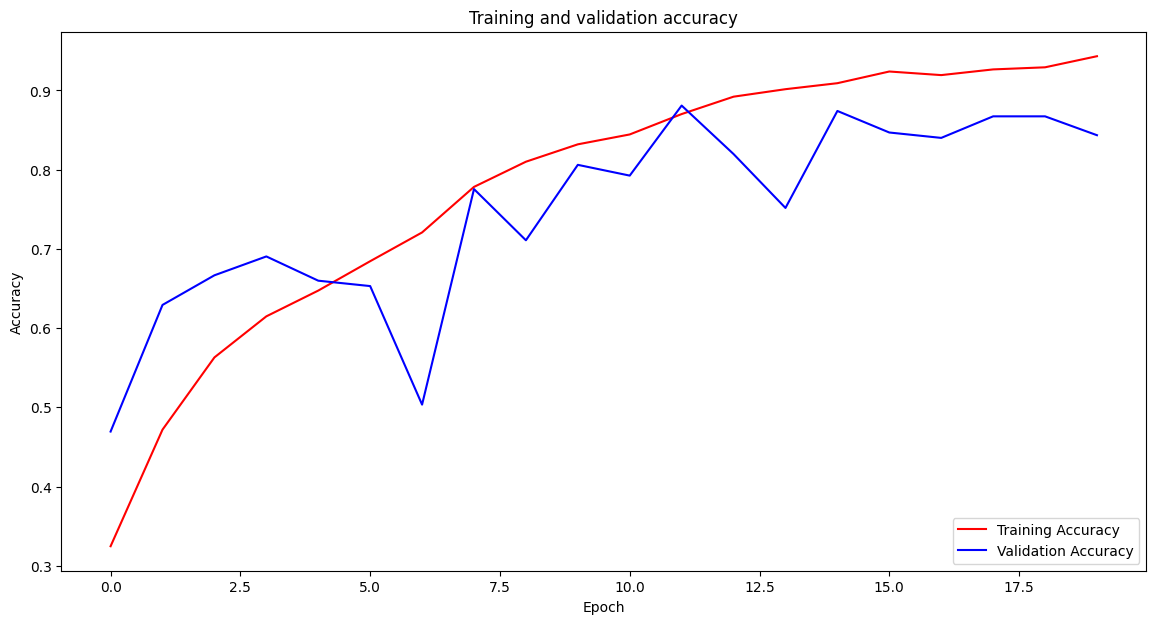

In [ ]:
model.save('brain_tumour_dec.h5')

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()


Text(0.5, 1.0, 'Training and validation loss')

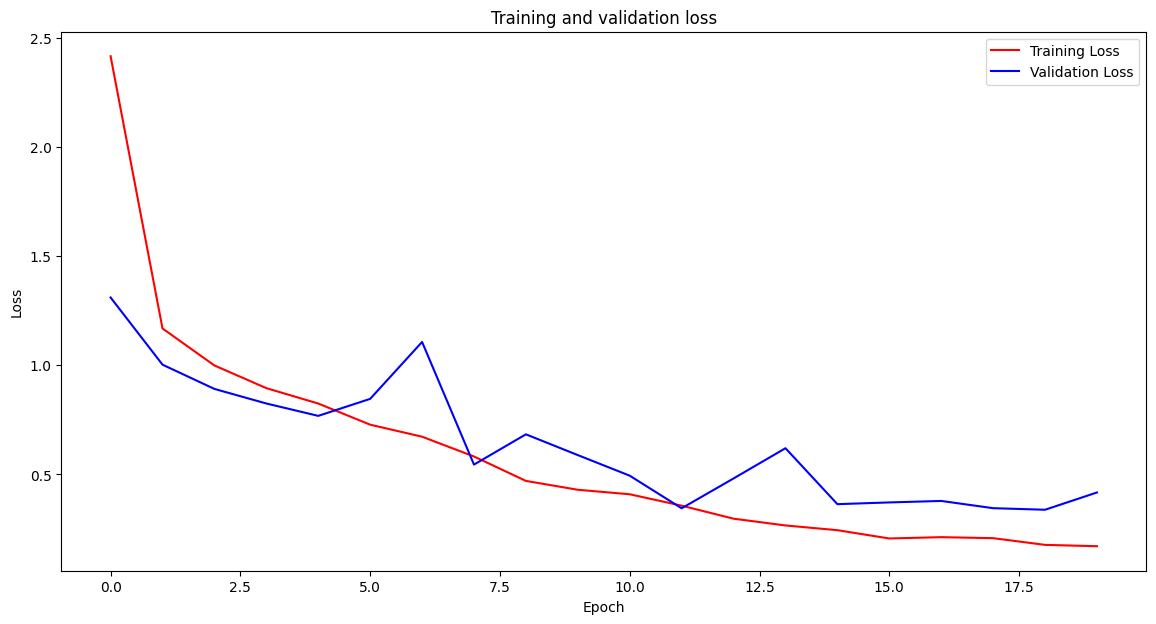

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
path = '/content/Testing/glioma_tumor/image(13).jpg'

In [ ]:
img = cv2.imread(path)
#img = cv2.resize(img,(150, 150))
try:
   img = cv2.resize(img, (150, 150), interpolation=cv2.INTER_AREA)
except:
   img = cv2.imread(path)
img_array = np.array(img)

img_array.shape

img_array=img_array.reshape(1,150,150,3)

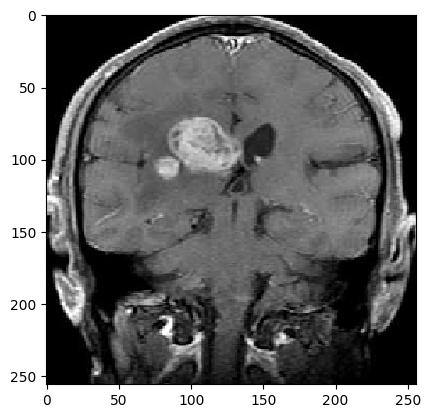

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img(path, target_size=(256, 256))
plt.imshow(img, interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
if indices == 0:
    print("glioma")
elif indices == 1:
    print("No tumor")
elif indices == 2:
    print("Melign")
elif indices == 3:
    print("Pituitary")

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
accuracy = np.sum(pred==y_test_new)/len(pred)
print("Accuracy on testing dataset: {:.2f}%".format(accuracy*100))

## Final Executable

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 121.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.9 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=d37f3dfcc007b991cb57a80915a6be34b755210aa1538a9d41ffbd44d8091baa
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
%%writefile app.py
import numpy as np
import streamlit as st
from keras.models import load_model
from PIL import Image,ImageOps
from keras.preprocessing import image


st.set_page_config(page_title="Brain_tumor - Ayush mahendra")

#Loading the Model
model = load_model('/content/drive/MyDrive/SavedModel/brain_tumour_dec.h5', compile=False)

#st.image('logo.png')
st.markdown("<h1 style='text-align:center;color:#128C7E;'>Brain_Tumor_Detection</h1>",unsafe_allow_html=True)
st.markdown("<h3 style='text-align:center;'>Created By : Ayush </h3>",unsafe_allow_html=True)

file = st.file_uploader("Upload a MRI scan...", type=['png','jpg','webp','jpeg'])
mapdict = { 0: 'Glioma_Tumor',
  1: 'No Tumor',
  2: 'Meningioma_Tumor',
  3: 'Pituitary_Tumor'
}

def predictimg(imagedata,model):
    size = (150,150)
    image = ImageOps.fit(imagedata,size,Image.ANTIALIAS)
    img = np.asarray(image)
    img_reshape = img[np.newaxis,...]
    a = model.predict(img_reshape)
    indices = a.argmax()
    ans = mapdict[indices]
    return ans

if file is not None:
    image = Image.open(file)
    st.image(image,use_column_width=True)
    ans = predictimg(image,model)
    st.subheader(ans)

Writing app.py


In [ ]:
!./ngrok authtoken 2OzzClsZneoaTq04rHeZDbfYIfb_5ExT3a1ppUiRMDWdS3tpk

/bin/bash: ./ngrok: No such file or directory


In [ ]:
!nohub streamlit run app.py &
!streamlit run app.py &>/dev/null&

/bin/bash: nohub: command not found


In [ ]:
!npm install -g localtunnel

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 1.957s


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=e1c417504d7748eef877af4a280f9240d692da4a38779a3b38555853c6fa7827
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
!curl ipv4.icanhazip.com

34.136.45.32


In [ ]:
!streamlit run /content/app.py & npx localtunnel --port 8501

[##................] - fetchMetadata: sill resolveWithNewModule yargs-parser@20


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://34.136.45.32:8502

npx: installed 22 in 2.665s
your url is: https://cyan-shrimps-cover.loca.lt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')